In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src')) # include top level package in python path

In [6]:
import torch
from model.fuzzy_logic import (
    ProductLogic, 
    MinimumLogic, 
    LukasiewiczLogic, 
    DrasticLogic,
    SchweizerSklarLogic,
    HamacherLogic,
)
import matplotlib.pyplot as plt

In [29]:
def plot_fuzzy_binop(f):
    ls = torch.linspace(0,1,100)
    y = (ls + torch.zeros((100,1))).flatten()
    x = (ls.unsqueeze(-1) + torch.zeros(100)).flatten()
    z = f(x,y)
    my_cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection ='3d')
    ax.view_init(elev=20., azim=260.)
    ax.plot_trisurf(x,y,z, cmap=my_cmap, edgecolor="black", linewidth=0, antialiased = 10)
    
    y = (torch.linspace(0,1,100) + torch.zeros((10,1)))
    x = (torch.linspace(0,1,10).unsqueeze(-1) + torch.zeros(100))
    z = f(x,y)
    for i in range(x.size(0)):
        xs = x[i].numpy()
        ys = y[i].numpy()
        zs = z[i].numpy()
        ax.plot(xs, ys, zs, color="black")
        
    y = (torch.linspace(0,1,10) + torch.zeros((100,1)))
    x = (torch.linspace(0,1,100).unsqueeze(-1) + torch.zeros(10))
    z = f(x,y)
    for i in range(x.size(1)):
        xs = x[:,i].numpy()
        ys = y[:,i].numpy()
        zs = z[:,i].numpy()
        ax.plot(xs, ys, zs, color="black")

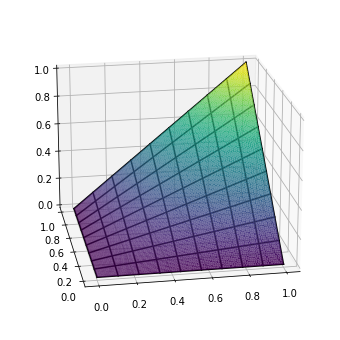

In [38]:
plot_fuzzy_binop(ProductLogic().bin_conjoin)

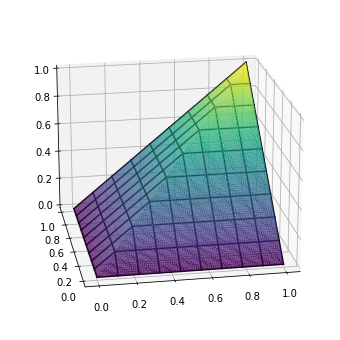

In [37]:
plot_fuzzy_binop(MinimumLogic().bin_conjoin)

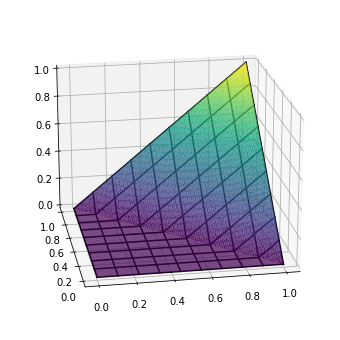

In [32]:
plot_fuzzy_binop(LukasiewiczLogic().bin_conjoin)

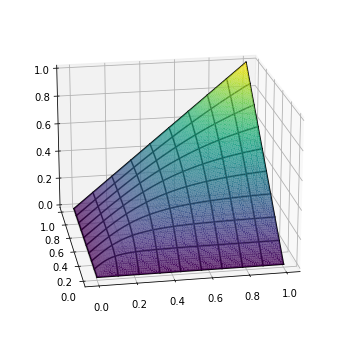

In [36]:
plot_fuzzy_binop(SchweizerSklarLogic(torch.tensor(-2.0)).bin_conjoin)

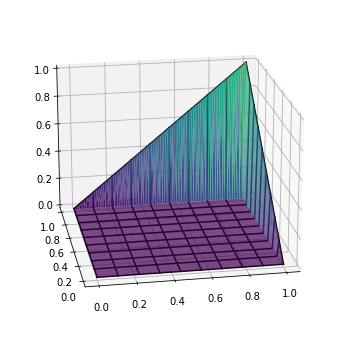

In [30]:
plot_fuzzy_binop(DrasticLogic().bin_conjoin)

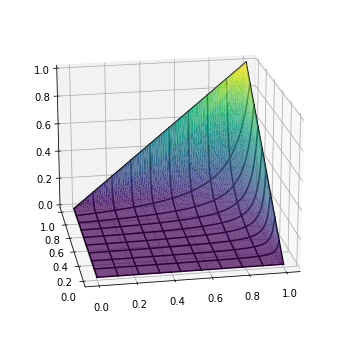

In [48]:
plot_fuzzy_binop(HamacherLogic(torch.tensor(100.0)).bin_conjoin)